In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = [x * 10 for x in range(10)]

data

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [3]:
labels = [f'{x}!' for x in range(10)]
labels

['0!', '1!', '2!', '3!', '4!', '5!', '6!', '7!', '8!', '9!']

Text(0.5, 1.0, 'Title')

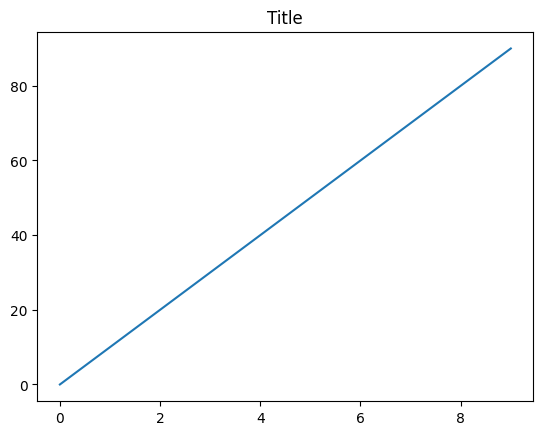

In [8]:
plt.plot(data) # x is added auto plot the y 
plt.title("Title")

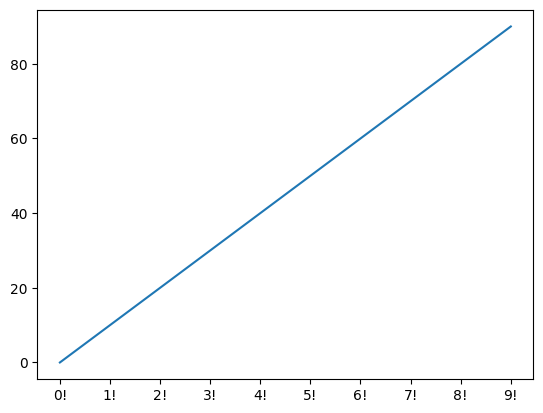

In [5]:
plt.plot(labels, data)

#plot.show() in ide

In [6]:
df = pd.DataFrame(data, labels).assign(series2 = lambda x:x[0]/2)

df.head()

,0,series2
0!,0,0.0
1!,10,5.0
2!,20,10.0
3!,30,15.0
4!,40,20.0


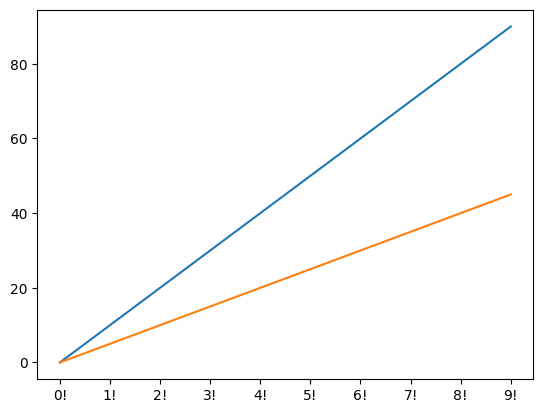

In [7]:
plt.plot(df)

### object oriented approach

Text(0.5, 0.98, 'Overall Title')

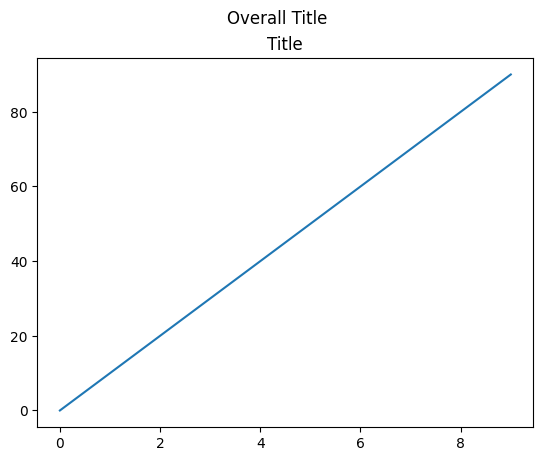

In [14]:
fig = plt.figure()

ax = fig.add_subplot()

# fig, ax = plt.subplots()

ax.plot(data)
ax.set_title("Title") # chart level title 
fig.suptitle("Overall Title") # figure level tile 

In [15]:
# from dataframes 
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data_dict = {
    "Sales":[10,20,30,40],
    "Profits": [2,4,3,1],
    "Date":["2022-01-01", "2022-02-01","2022-03-01","2022-04-01"]
}

df = pd.DataFrame(
    data_dict,
    columns=["Sales", "Profits"],
    index=data_dict["Date"]
)

df

,Sales,Profits
2022-01-01,10,2
2022-02-01,20,4
2022-03-01,30,3
2022-04-01,40,1


Text(0.5, 1.0, 'Product Sales and Profits')

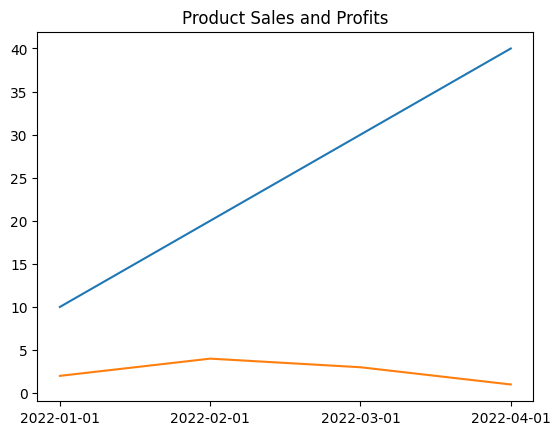

In [19]:
fig, ax = plt.subplots()

ax.plot(df)
ax.set_title("Product Sales and Profits")

Text(0.5, 1.0, 'Product Sales and Profits')

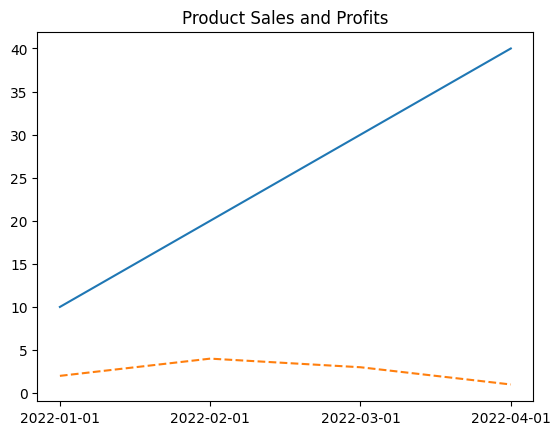

In [22]:
fig, ax = plt.subplots()

ax.plot(df.index, df["Sales"])
ax.plot(df.index, df["Profits"], ls="--")
ax.set_title("Product Sales and Profits")

In [32]:
hotels = pd.read_excel("./data/HotelCustomersDataset.xlsx")

hotels["date"] = (
    pd.to_datetime("2018-12-31")
    - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")
).astype("datetime64[ns]")

### Assignment 1 plot df
- plot logingrevenue and otherrevenue columns in a line chart from the monthly_revenue df created below
- 

In [33]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    83590 non-null  int64         
 1   Nationality           83590 non-null  object        
 2   Age                   79811 non-null  float64       
 3   DaysSinceCreation     83590 non-null  int64         
 4   AverageLeadTime       83590 non-null  int64         
 5   LodgingRevenue        83590 non-null  float64       
 6   OtherRevenue          83590 non-null  float64       
 7   BookingsCanceled      83590 non-null  int64         
 8   BookingsNoShowed      83590 non-null  int64         
 9   BookingsCheckedIn     83590 non-null  int64         
 10  PersonsNights         83590 non-null  int64         
 11  RoomNights            83590 non-null  int64         
 12  DaysSinceLastStay     83590 non-null  int64         
 13  DaysSinceFirstSt

In [34]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [36]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum","OtherRevenue":"sum" })
)

monthly_revenue = daily_revenue.resample("ME").sum()

In [37]:
monthly_revenue.head()

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35


Text(0.5, 1.0, 'Revenue plot')

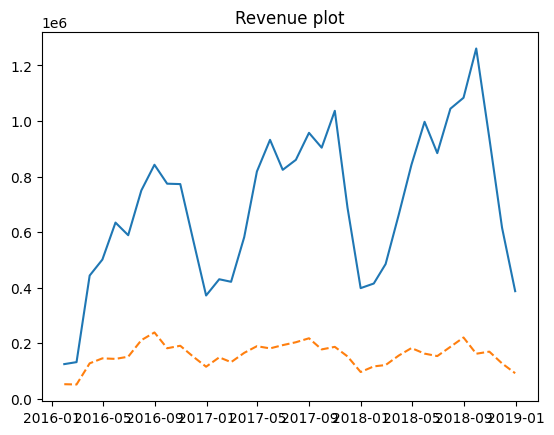

In [38]:
fig, ax = plt.subplots()

ax.plot(monthly_revenue.index, monthly_revenue["LodgingRevenue"])
ax.plot(monthly_revenue.index, monthly_revenue["OtherRevenue"], ls="--")
ax.set_title("Revenue plot")

### Chart titles and font sizes 

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
housing_raw = pd.read_csv(
    "./data/housing_data.csv",
    parse_dates = ["period_begin", "period_end"],
    dtype={"total_home_sold":"Int32","region_name":"category"}
)


In [3]:
housing_raw.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,NaN,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325.0,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577.0,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22.0,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12.0,54.0,55.0,151.2,158062.5,38.300000


In [4]:
housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622339 entries, 0 to 622338
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   region_name               622339 non-null  category      
 1   period_begin              622339 non-null  datetime64[ns]
 2   period_end                622339 non-null  datetime64[ns]
 3   total_homes_sold          567839 non-null  float64       
 4   inventory                 616247 non-null  float64       
 5   active_listings           616905 non-null  float64       
 6   age_of_inventory          616247 non-null  float64       
 7   median_active_list_price  616513 non-null  float64       
 8   months_of_supply          561319 non-null  float64       
dtypes: category(1), datetime64[ns](2), float64(6)
memory usage: 39.3 MB


In [5]:
ca_housing = housing_raw.loc[
        (housing_raw["region_name"].str.contains("CA"))
].assign(region_name = housing_raw["region_name"].str[0:-11])

In [6]:
ca_housing.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
Index: 15228 entries, 6 to 622302
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   region_name               15228 non-null  object        
 1   period_begin              15228 non-null  datetime64[ns]
 2   period_end                15228 non-null  datetime64[ns]
 3   total_homes_sold          14841 non-null  float64       
 4   inventory                 15217 non-null  float64       
 5   active_listings           15218 non-null  float64       
 6   age_of_inventory          15217 non-null  float64       
 7   median_active_list_price  15208 non-null  float64       
 8   months_of_supply          14829 non-null  float64       
dtypes: datetime64[ns](2), float64(6), object(1)
memory usage: 2.0 MB


In [7]:
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107.0,1729.0,2206.0,27.5,445540.9,5.235794
164,Nevada,2018-09-03,2018-11-25,529.0,480.0,517.0,71.4,557508.3,12.165607
252,Stanislaus,2017-06-05,2017-08-27,1572.0,1042.0,1193.0,38.8,320660.0,9.212632
293,Tehama,2020-01-20,2020-04-12,102.0,241.0,252.0,99.2,297979.1,31.530228
304,Stanislaus,2017-11-13,2018-02-04,1200.0,797.0,907.0,56.5,330049.9,9.744362


In [9]:
ca_housing_pivot = ca_housing.pivot_table(index="period_begin",
                                          columns = "region_name",
                                          values = "median_active_list_price").assign(
                                          CA_average = lambda x : x.mean(axis=1))
ca_housing_pivot.head()

region_name,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,El Dorado,Fresno,Glenn,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba,CA_average
period_begin,,,,,,,,,,,,,,,,,,,,,
2017-01-02,730602.5,317541.6,408570.6,291315.3,503458.3,339075.0,603901.2,557404.1,251850.0,237145.8,...,300302.0,257172.9,241695.8,374187.5,225395.8,493908.3,661054.7,447859.2,326833.3,492258.437736
2017-01-09,736230.0,324125.0,408566.4,292348.2,517645.8,340291.6,610701.2,563658.3,253016.6,237145.8,...,301900.0,264609.3,243979.1,368312.5,227729.1,449816.6,662463.1,449942.5,336129.1,493710.639623
2017-01-16,742021.6,330708.3,408483.2,293514.9,524108.3,340291.6,616534.5,565908.3,254187.5,237841.6,...,303858.3,270795.8,246266.6,363729.1,229060.4,412975.0,664828.6,453525.8,345425.0,495369.416981
2017-01-23,748271.7,341458.3,408404.0,294619.1,536408.3,341958.3,621617.8,567158.3,255854.1,238041.6,...,306350.0,274861.4,248141.6,360437.5,229806.2,373483.3,666362.5,456875.8,354720.8,497191.662264
2017-01-30,753938.4,355541.6,407079.0,295527.4,543704.1,344041.6,625516.2,567533.3,258000.0,238125.0,...,308191.6,279764.5,249762.5,360250.0,230139.5,333991.6,668787.5,458300.8,364016.6,499286.207547


<Axes: xlabel='period_begin'>

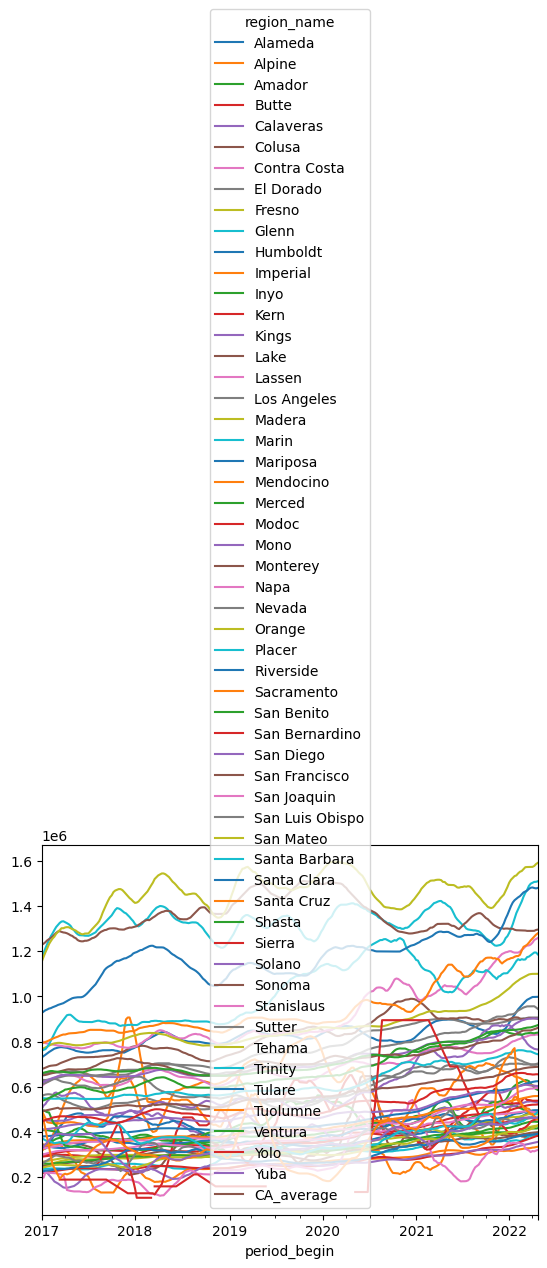

In [10]:
ca_housing_pivot.plot()

In [12]:
ca_housing_markets = ca_housing_pivot.loc[:,["San Francisco",
                                             "Los Angeles",
                                             "San Diego",
                                             "CA_average"]]
ca_housing_markets.head()

region_name,San Francisco,Los Angeles,San Diego,CA_average
period_begin,,,,
2017-01-02,1229018.7,611561.0,618570.8,492258.437736
2017-01-09,1233393.7,614061.0,621737.5,493710.639623
2017-01-16,1239977.0,617311.0,625820.8,495369.416981
2017-01-23,1247977.0,620644.3,629491.6,497191.662264
2017-01-30,1253310.4,624541.6,632824.0,499286.207547


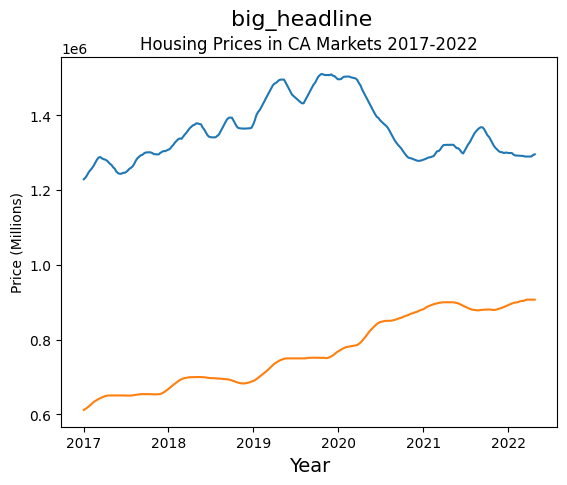

In [25]:
fig , ax = plt.subplots()

# ax.plot(ca_housing_markets)

ax.plot(ca_housing_markets["San Francisco"])
ax.plot(ca_housing_markets["Los Angeles"])

fig.suptitle("big_headline", fontsize=16)
ax.set_title("Housing Prices in CA Markets 2017-2022", fontsize=12)
ax.set_xlabel("Year",  fontsize=14)
ax.set_ylabel("Price (Millions)")

plt.show()

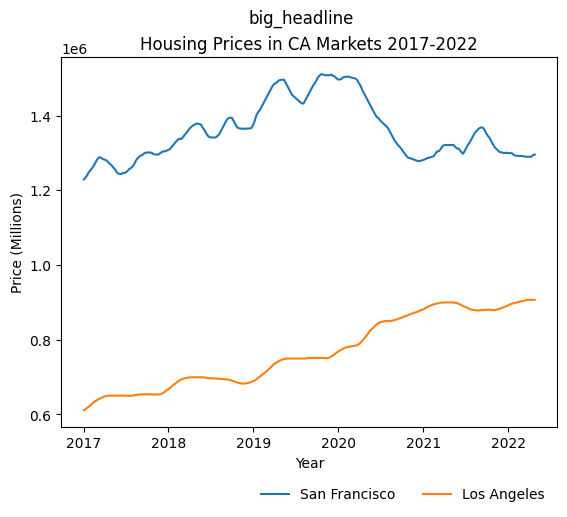

In [39]:
### chart legends 
fig , ax = plt.subplots()

# ax.plot(ca_housing_markets)

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["San Francisco"],
    label="San Francisco"
)
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["Los Angeles"],
    label = "Los Angeles"
)

fig.suptitle("big_headline")
ax.set_title("Housing Prices in CA Markets 2017-2022")
ax.set_xlabel("Year")
ax.set_ylabel("Price (Millions)")

# passing correct seq will work
#ax.legend(ca_housing_markets.columns)
#ax.legend(["CA","LA"])
ax.legend(bbox_to_anchor= (1,-.13), ncol=2 , frameon=False
    #loc="lower right"
)

plt.show()

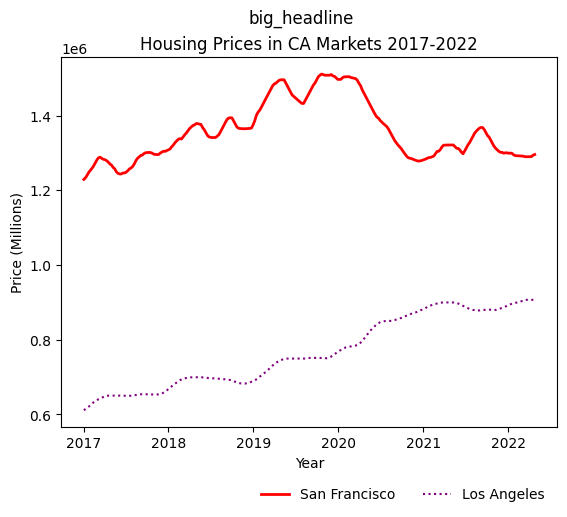

In [42]:
### Line style 

fig , ax = plt.subplots()

# ax.plot(ca_housing_markets)

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["San Francisco"],
    label="San Francisco",
    color= "red",
    linewidth = 2
)
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["Los Angeles"],
    label= "Los Angeles",
    color = "purple",
    ls=":"
)

fig.suptitle("big_headline")
ax.set_title("Housing Prices in CA Markets 2017-2022")
ax.set_xlabel("Year")
ax.set_ylabel("Price (Millions)")

# passing correct seq will work
#ax.legend(ca_housing_markets.columns)
#ax.legend(["CA","LA"])
ax.legend(bbox_to_anchor= (1,-.13), ncol=2 , frameon=False
    #loc="lower right"
)

plt.show()

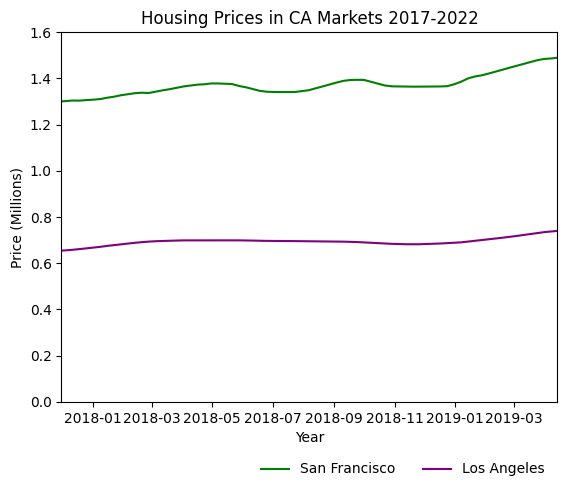

In [46]:
### Line style 

fig , ax = plt.subplots()

# ax.plot(ca_housing_markets)

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["San Francisco"]/1000000,
    label="San Francisco",
    color= "green"
)
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["Los Angeles"]/1000000,
    label= "Los Angeles",
    color = "purple"
)

ax.set_title("Housing Prices in CA Markets 2017-2022")
ax.set_xlabel("Year")
ax.set_ylabel("Price (Millions)")

ax.legend(bbox_to_anchor= (1,-.13), ncol=2 , frameon=False)
ax.set_ylim(0, 1.6)
ax.set_xlim(17500, 18000)

plt.show()

In [53]:
def cm_to_inches(cm):
    return cm / 2.54

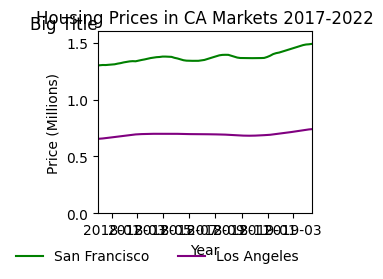

In [55]:
#figsize 
### Line style 

fig , ax = plt.subplots(figsize=(cm_to_inches(7),cm_to_inches(6)))

# ax.plot(ca_housing_markets)

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["San Francisco"]/1000000,
    label="San Francisco",
    color= "green"
)
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["Los Angeles"]/1000000,
    label= "Los Angeles",
    color = "purple"
)
fig.suptitle("Big Title" , y=.95 , x=0)
ax.set_title("Housing Prices in CA Markets 2017-2022")
ax.set_xlabel("Year")
ax.set_ylabel("Price (Millions)")

ax.legend(bbox_to_anchor= (1,-.13), ncol=2 , frameon=False)
ax.set_ylim(0, 1.6)
ax.set_xlim(17500, 18000)

plt.show()


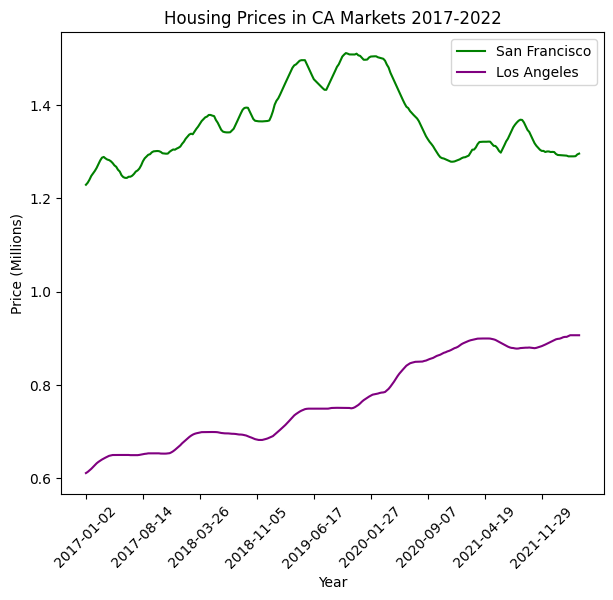

In [58]:
# custom x axis ticks 
#figsize 
### Line style 

fig , ax = plt.subplots(figsize=(7,6))

# ax.plot(ca_housing_markets)

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["San Francisco"]/1000000,
    label="San Francisco",
    color= "green"
)
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["Los Angeles"]/1000000,
    label= "Los Angeles",
    color = "purple"
)

ax.set_title("Housing Prices in CA Markets 2017-2022")
ax.set_xlabel("Year")
ax.set_ylabel("Price (Millions)")
#ax.set_xticks(['2017-04-19', '2020-03-21', '2023-06-30'])
ax.set_xticks(ca_housing_markets.index[::32])
plt.xticks(rotation=45)

ax.legend()


plt.show()


In [61]:
import datetime 
max(ca_housing_markets.index) - datetime.datetime(1970, 1, 1)

Timedelta('19107 days 00:00:00')

In [63]:
datetime.datetime(2018, 3, 21) - datetime.datetime(1970, 1, 1)

datetime.timedelta(days=17611)

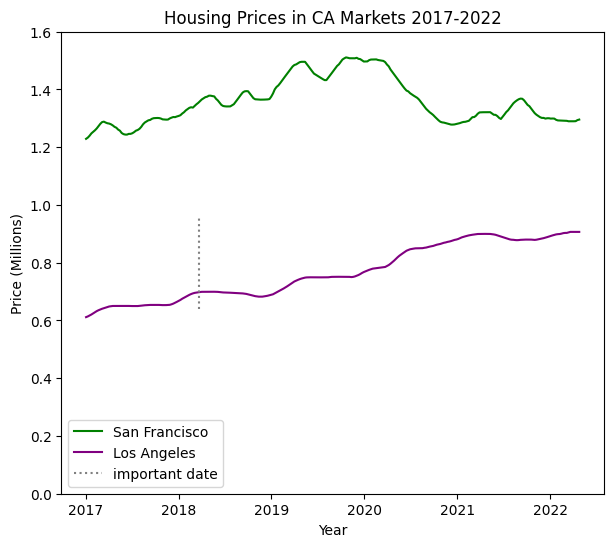

In [67]:
# adding vertical line

fig , ax = plt.subplots(figsize=(7,6))

# ax.plot(ca_housing_markets)

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["San Francisco"]/1000000,
    label="San Francisco",
    color= "green"
)
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["Los Angeles"]/1000000,
    label= "Los Angeles",
    color = "purple"
)

ax.set_title("Housing Prices in CA Markets 2017-2022")
ax.set_xlabel("Year")
ax.set_ylabel("Price (Millions)")
ax.set_ylim(0, 1.6)
ax.axvline(17611, ymin=.4, ymax=.6, c="grey", ls=":", label="important date")


ax.legend()


plt.show()
